In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/train.csv')
valid_translated = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/valid_translated.csv')
valid = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/validation.csv')
test = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/test.csv')

Hàm hỗ trợ visu

In [68]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


# TRAIN VISU

Thông tin chung

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             223549 non-null  object
 1   comment_text   223549 non-null  object
 2   toxic          223549 non-null  int64 
 3   severe_toxic   223549 non-null  int64 
 4   obscene        223549 non-null  int64 
 5   threat         223549 non-null  int64 
 6   insult         223549 non-null  int64 
 7   identity_hate  223549 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 13.6+ MB


10 ví dụ đầu

In [70]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Tạo đồ thị

In [71]:
train_toxic = train.toxic.to_list().count(1)
train_non_toxic = train.toxic.to_list().count(0)

train_severe_toxic = train.severe_toxic.to_list().count(1)
train_obscene = train.obscene.to_list().count(1)
train_threat = train.threat.to_list().count(1)
train_insult = train.insult.to_list().count(1)
train_identity_hate = train.identity_hate.to_list().count(1)

Toxic vs Non-toxic

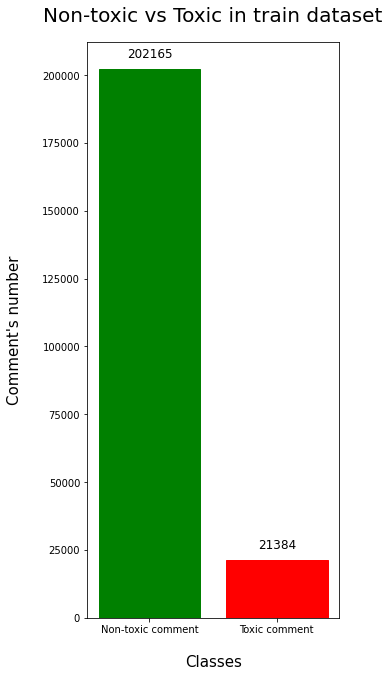

In [72]:
fig, ax = plt.subplots()

bar_list = ax.bar(['Non-toxic comment', 'Toxic comment'], [train_non_toxic, train_toxic], width=0.8)

labels = [train_non_toxic, train_toxic]

for i, v in enumerate(labels):
    ax.text(i, labels[i]+3000, labels[i],  fontsize=12, ha='center', va='bottom')

set_size(3.5, 8)

bar_list[0].set_color('g')
bar_list[1].set_color('r')

plt.title('Non-toxic vs Toxic in train dataset', fontdict={'fontsize': 20}, pad=20)
plt.xlabel('Classes', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)

fig.show()

Toxic comments per Classes

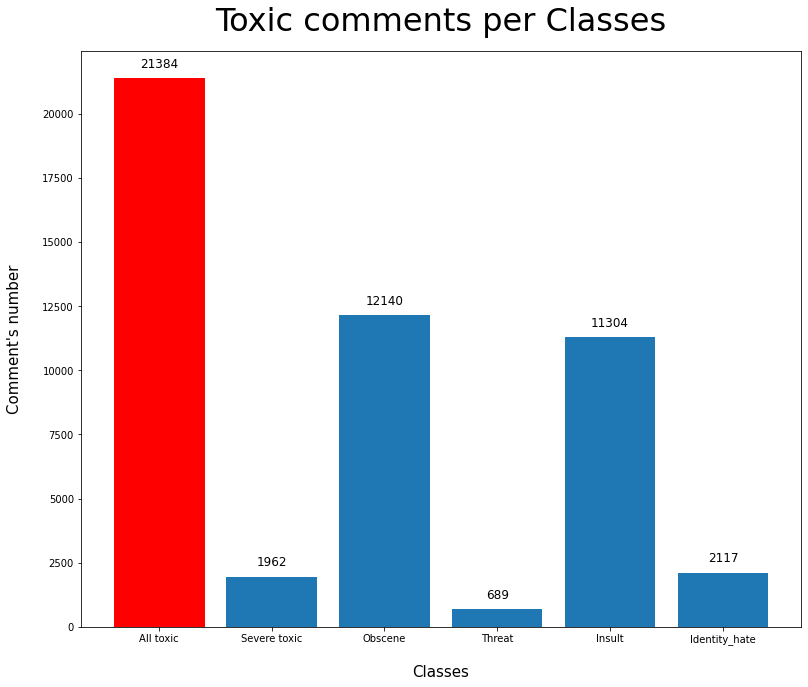

In [73]:
fig, ax = plt.subplots()

bar_list = ax.bar(['All toxic', 'Severe toxic', 'Obscene', 'Threat', 'Insult', 'Identity_hate'], [train_toxic, train_severe_toxic, train_obscene, train_threat, train_insult, train_identity_hate], width=0.8)

labels = [train_toxic, train_severe_toxic, train_obscene, train_threat, train_insult, train_identity_hate]

for i, v in enumerate(labels):
    ax.text(i, labels[i]+300, labels[i],  fontsize=12, ha='center', va='bottom')

set_size(10, 8)

bar_list[0].set_color('r')

plt.title('Toxic comments per Classes', fontdict={'fontsize': 32}, pad=20)
plt.xlabel('Classes', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)

fig.show()

Theo length comment

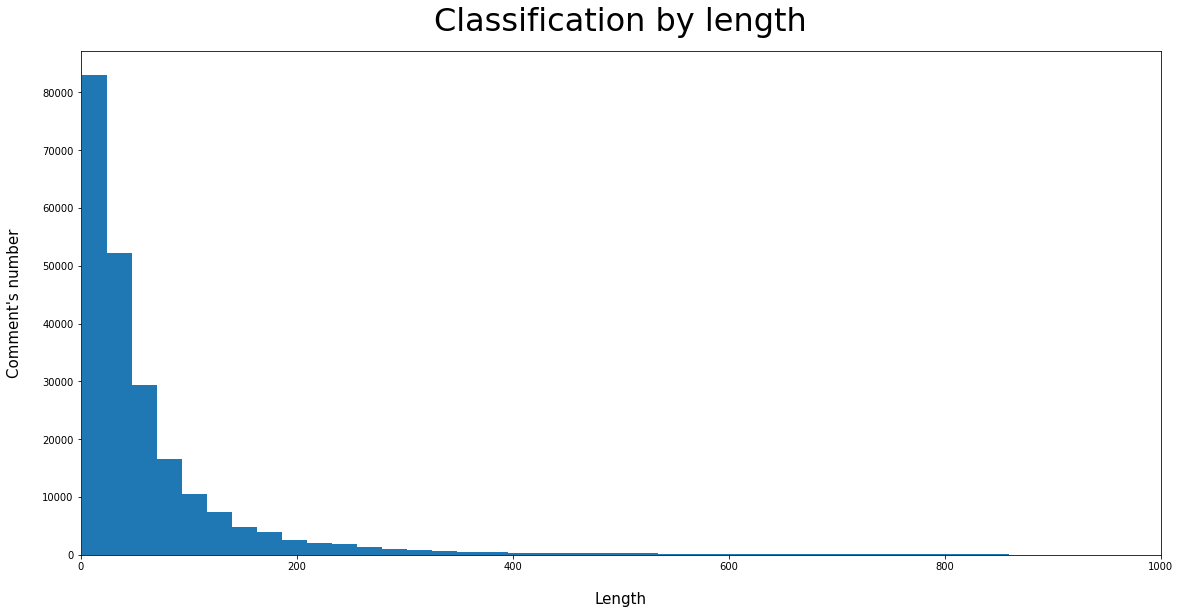

In [74]:
length_list = np.array([len(i.split()) for i in train.comment_text.to_list()])
plt.hist(length_list, bins=100)
set_size(15, 7)
plt.title('Classification by length', fontdict={'fontsize': 32}, pad=20)
plt.xlabel('Length', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)
plt.xlim((0, 1000))
plt.show()

# VALIDATION VISU

In [75]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8000 non-null   int64 
 1   comment_text  8000 non-null   object
 2   lang          8000 non-null   object
 3   toxic         8000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 250.1+ KB


In [76]:
valid.head(10)

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0
5,5,"güzel, zaten kaynaklandırması zor subjektif ka...",tr,0
6,6,"No es mala idea. De hecho, yo estaba pensando ...",es,0
7,7,"Kod hatalarını düzeltmişsiniz,elinize sağlık ç...",tr,0
8,8,Levent Abi nasılsın? Hayat nasıl gidiyor? Umar...,tr,0
9,9,Creo que es importante que podamos reconocer a...,es,0


In [77]:
valid_toxic = valid.toxic.to_list().count(1)
valid_non_toxic = valid.toxic.to_list().count(0)

Toxic vs non-toxic

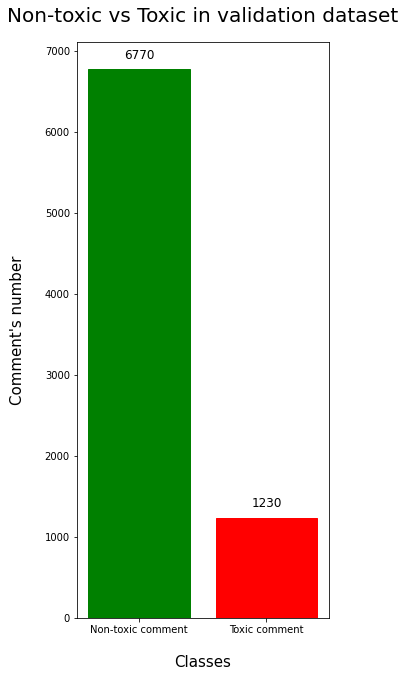

In [78]:
fig, ax = plt.subplots()

bar_list = ax.bar(['Non-toxic comment', 'Toxic comment'], [valid_non_toxic, valid_toxic], width=0.8)

labels = [valid_non_toxic, valid_toxic]

for i, v in enumerate(labels):
    ax.text(i, labels[i]+100, labels[i],  fontsize=12, ha='center', va='bottom')

set_size(3.5, 8)

bar_list[0].set_color('g')
bar_list[1].set_color('r')

plt.title('Non-toxic vs Toxic in validation dataset', fontdict={'fontsize': 20}, pad=20)
plt.xlabel('Classes', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)

fig.show()

Classification by languages

In [79]:
set_language = set([i  for i in valid.lang])
print(set_language)

{'it', 'es', 'tr'}


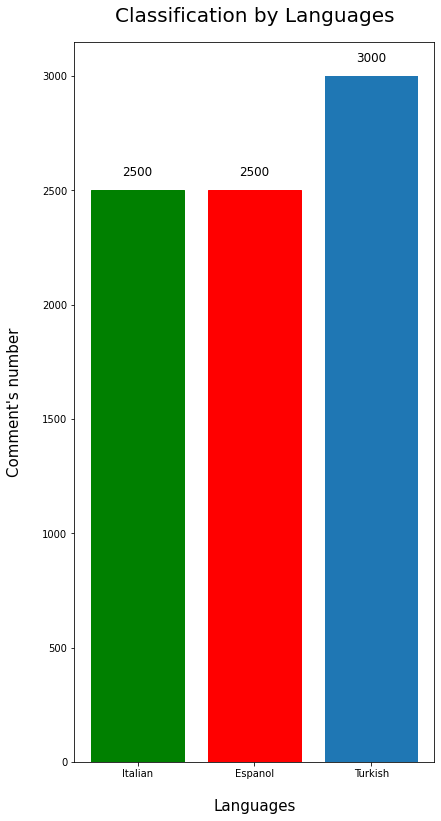

In [80]:
fig, ax = plt.subplots()

length_list = [valid.lang.to_list().count(i) for i in set_language]

bar_list = ax.bar(['Italian', 'Espanol', 'Turkish'], length_list, width=0.8)

labels = length_list

for i, v in enumerate(labels):
    ax.text(i, labels[i]+50, labels[i],  fontsize=12, ha='center', va='bottom')

set_size(5, 10)

bar_list[0].set_color('g')
bar_list[1].set_color('r')

plt.title('Classification by Languages', fontdict={'fontsize': 20}, pad=20)
plt.xlabel('Languages', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)

plt.show()

Classification by Length

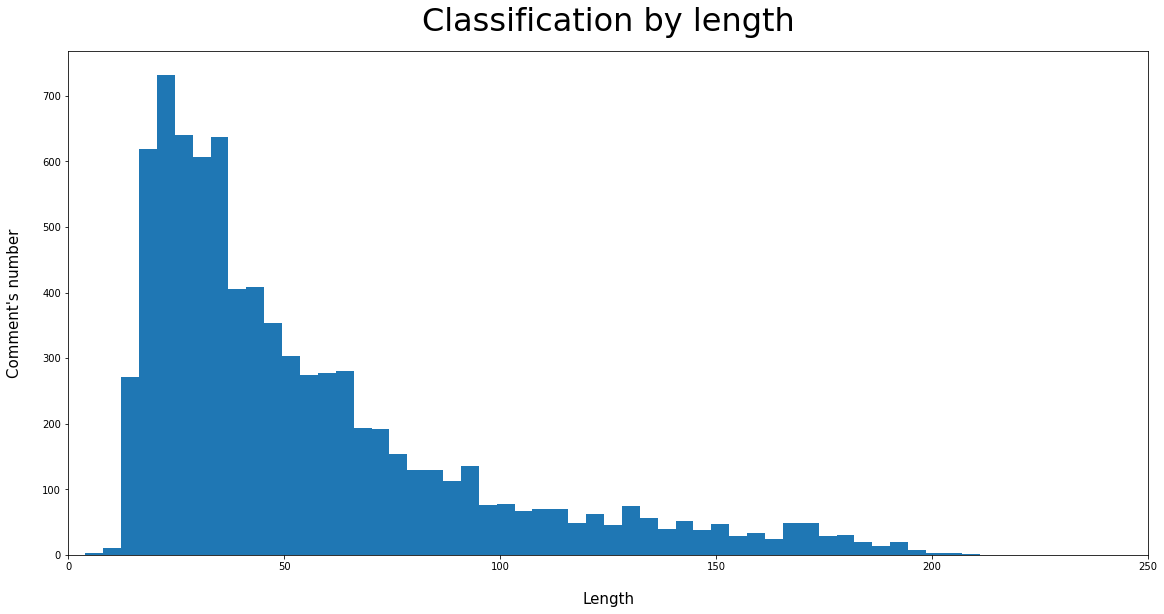

In [81]:
length_list = np.array([len(i.split()) for i in valid.comment_text.to_list()])
plt.hist(length_list, bins=50)
set_size(15, 7)
plt.title('Classification by length', fontdict={'fontsize': 32}, pad=20)
plt.xlabel('Length', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)
plt.xlim((0, 250))
plt.show()

# TEST VISU

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63812 entries, 0 to 63811
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       63812 non-null  int64 
 1   content  63812 non-null  object
 2   lang     63812 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [83]:
test.head(10)

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr
5,5,Le truc le plus important dans ta tirade c est...,fr
6,6,"20px Caro editor, encontramos problemas na edi...",pt
7,7,el skate es unos de los deportes favoritos de ...,es
8,8,Me doy la bienvenida. A este usuari le gusta c...,es
9,9,"ES NOTABLEMENTE TENDENCIOSO, NO SE HABLA DE CU...",es


Classification by Languages


In [84]:
set_language = set([i  for i in test.lang])
print(set_language)

{'it', 'pt', 'fr', 'tr', 'es', 'ru'}


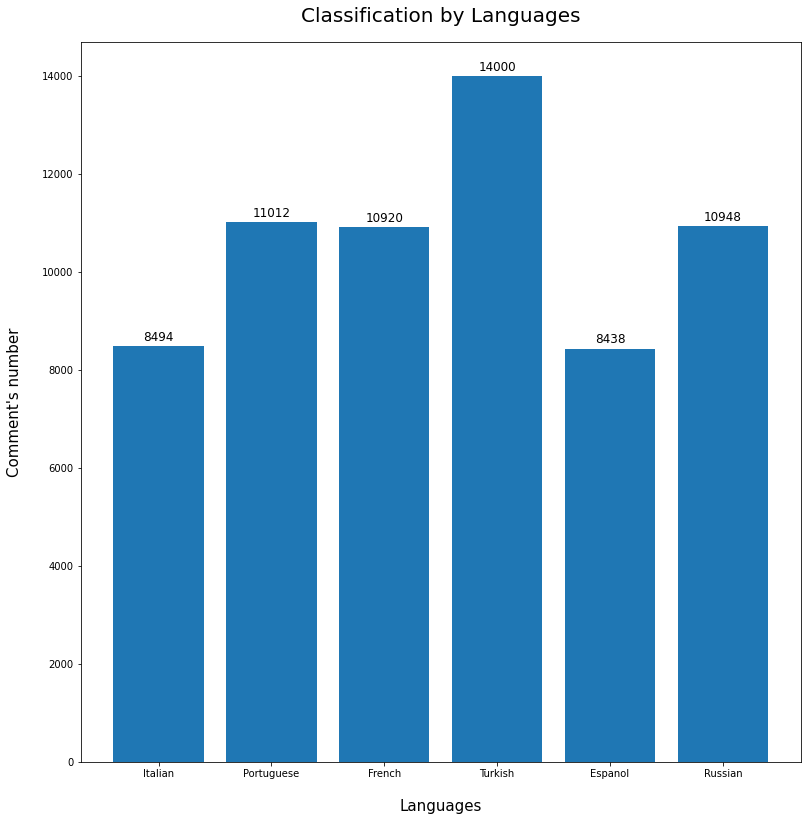

In [85]:
fig, ax = plt.subplots()

length_list = [test.lang.to_list().count(i) for i in set_language]

bar_list = ax.bar(['Italian', 'Portuguese', 'French', 'Turkish', 'Espanol', 'Russian'], length_list, width=0.8)

labels = length_list

for i, v in enumerate(labels):
    ax.text(i, labels[i]+50, labels[i],  fontsize=12, ha='center', va='bottom')

set_size(10, 10)

plt.title('Classification by Languages', fontdict={'fontsize': 20}, pad=20)
plt.xlabel('Languages', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)

plt.show()

Classification by Length


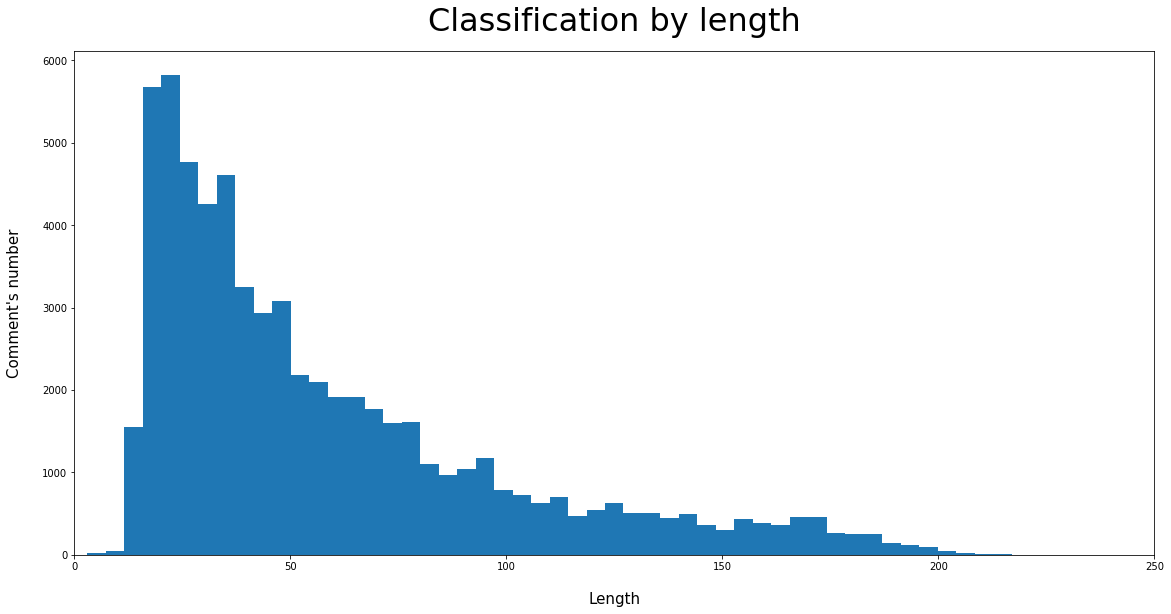

In [86]:
length_list = np.array([len(i.split()) for i in test.content.to_list()])
plt.hist(length_list, bins=50)
set_size(15, 7)
plt.title('Classification by length', fontdict={'fontsize': 32}, pad=20)
plt.xlabel('Length', fontdict={'fontsize': 15}, labelpad=20)
plt.ylabel('Comment\'s number', fontdict={'fontsize': 15}, labelpad=20)
plt.xlim((0, 250))
plt.show()